In [25]:
# import packages 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.decomposition import PCA
from sklearn import preprocessing
import seaborn as sns 

In [26]:
# Import DEG data from Rstudio output (DESeq2 analysis) 
counts = pd.read_csv('9_create_GeneCountsMatrix/gene_matrix_count.csv')

In [27]:
# reset indx and transform 
counts = counts.set_index('Geneid').T

# use standard Scaler from sklearn preprocessing to scale the data
scaler = preprocessing.StandardScaler()
X_scaled  = scaler.fit_transform(counts)

# decomposition from many components to only 2 (to be able to plot it) 
pca = PCA(n_components=2)
counts_transfomred = pca.fit_transform(X_scaled)
# print the explained variance ratio
print(pca.explained_variance_ratio_)

[0.42077571 0.13440361]


In [28]:
# convert the sample names to uniform condition names for plot legend 
def transform_index_to_number(sample:str)->int:
    """Transform the index of the counts dataframe to a number"""
    if sample.startswith('N'):
        return 'Normoxia'
    elif sample.startswith('A'):
        return 'Anoxia'
    elif sample.startswith('R'):
        return 'Reoxygenation'

colors = counts.index.map(transform_index_to_number)

Text(0.5, 1.0, 'Sample Clustering in RNA Sequencing Data')

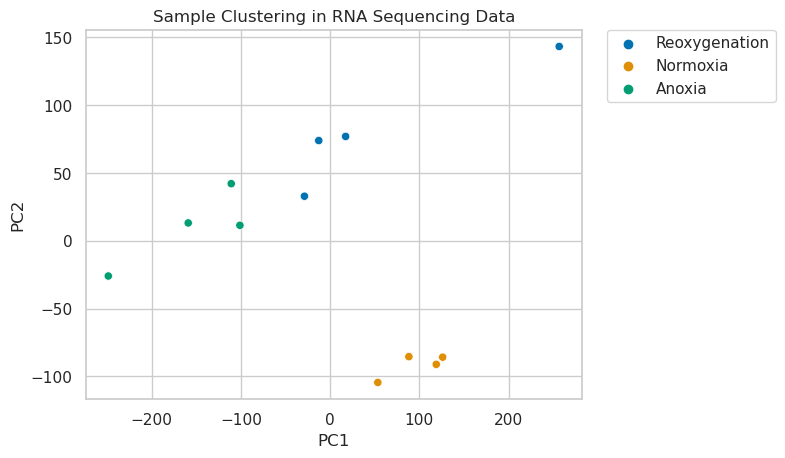

In [29]:
# PLOT 
sns.set_theme(palette = 'colorblind', style = 'whitegrid')
g = sns.scatterplot(x=counts_transfomred[:,0], y=counts_transfomred[:,1], hue=colors, )
sns.move_legend(g, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Sample Clustering in RNA Sequencing Data')